In [59]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import colorlover as cl
sb.set()
%matplotlib inline

In [60]:
codes = pd.read_csv('country_codes.csv')
continentCodes = pd.read_csv('continents.csv')
df = pd.read_csv('data.csv')

df = df.rename(columns={'Explained by: GDP per capita': 'GDP per capita', 'Explained by: Social support': 'Social support', 'Explained by: Healthy life expectancy': 'Healthy life expectancy', 'Explained by: Freedom to make life choices': 'Freedom', 'Explained by: Generosity': 'Generosity', 'Explained by: Perceptions of corruption': 'Corruption'})

df = df.replace('Taiwan Province of China', 'Taiwan')
df = df.replace('South Korea', 'Korea, South')
df = df.replace('North Korea', 'Korea, North')
df = df.replace('Northern Cyprus', 'Cyprus')
df = df.replace('Hong Kong SAR, China', 'Hong Kong')
df = df.replace('Palestinian Territories', 'West Bank')

df = df.replace('Congo (Brazzaville)', 'Congo, Republic of the')
df = df.replace('Congo (Kinshasa)', 'Congo, Democratic Republic of the')
df = df.replace('Myanmar', 'Burma')
df = df.replace({'&': 'and'}, regex=True)

codes = codes.set_index("COUNTRY")
continentCodes = continentCodes.set_index("Country")

countryCodes = []
continents = []

for row in df['Country']:
    continents.append(continentCodes.loc[row, 'Continent'])

df['Continent'] = continents

df = df.replace('Ivory Coast', 'Cote d\'Ivoire')

for row in df['Country']:
    countryCodes.append(codes.loc[row, 'CODE'])

df['Country Code'] = countryCodes

df.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.92) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Corruption,Continent,Country Code
0,Finland,7.632,7.695,7.569,2.595,1.305,1.592,0.874,0.681,0.192,0.393,Europe,FIN
1,Norway,7.594,7.657,7.530,2.383,1.456,1.582,0.861,0.686,0.286,0.340,Europe,NOR
2,Denmark,7.555,7.623,7.487,2.370,1.351,1.590,0.868,0.683,0.284,0.408,Europe,DNK
3,Iceland,7.495,7.593,7.398,2.426,1.343,1.644,0.914,0.677,0.353,0.138,Europe,ISL
4,Switzerland,7.487,7.570,7.405,2.320,1.420,1.549,0.927,0.660,0.256,0.357,Europe,CHE


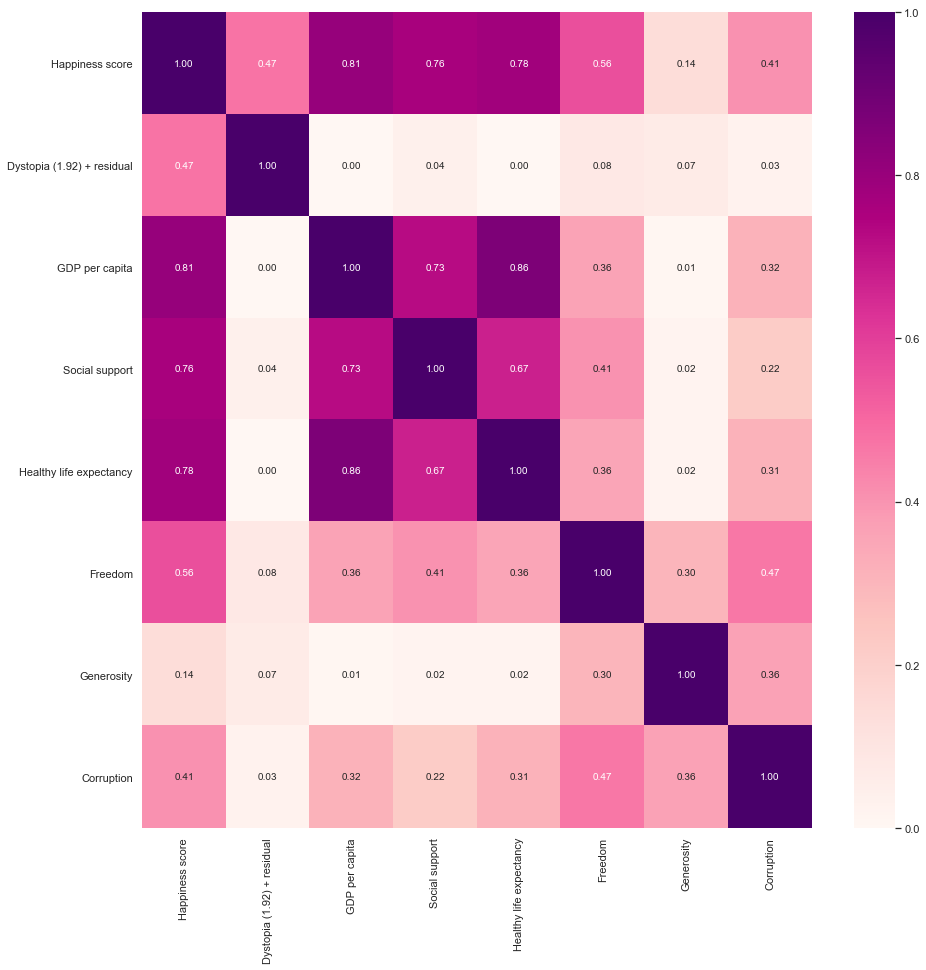

In [61]:
columns = ['Happiness score', 'Dystopia (1.92) + residual', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom', 'Generosity', 'Corruption', 'Continent']
trainDF = df[columns]

f, axes = plt.subplots(1, 1, figsize=(15, 15))
sb.heatmap(trainDF.corr().abs(), vmin = 0, vmax = 1, annot = True, fmt = ".2f", cmap="RdPu", cbar=True)

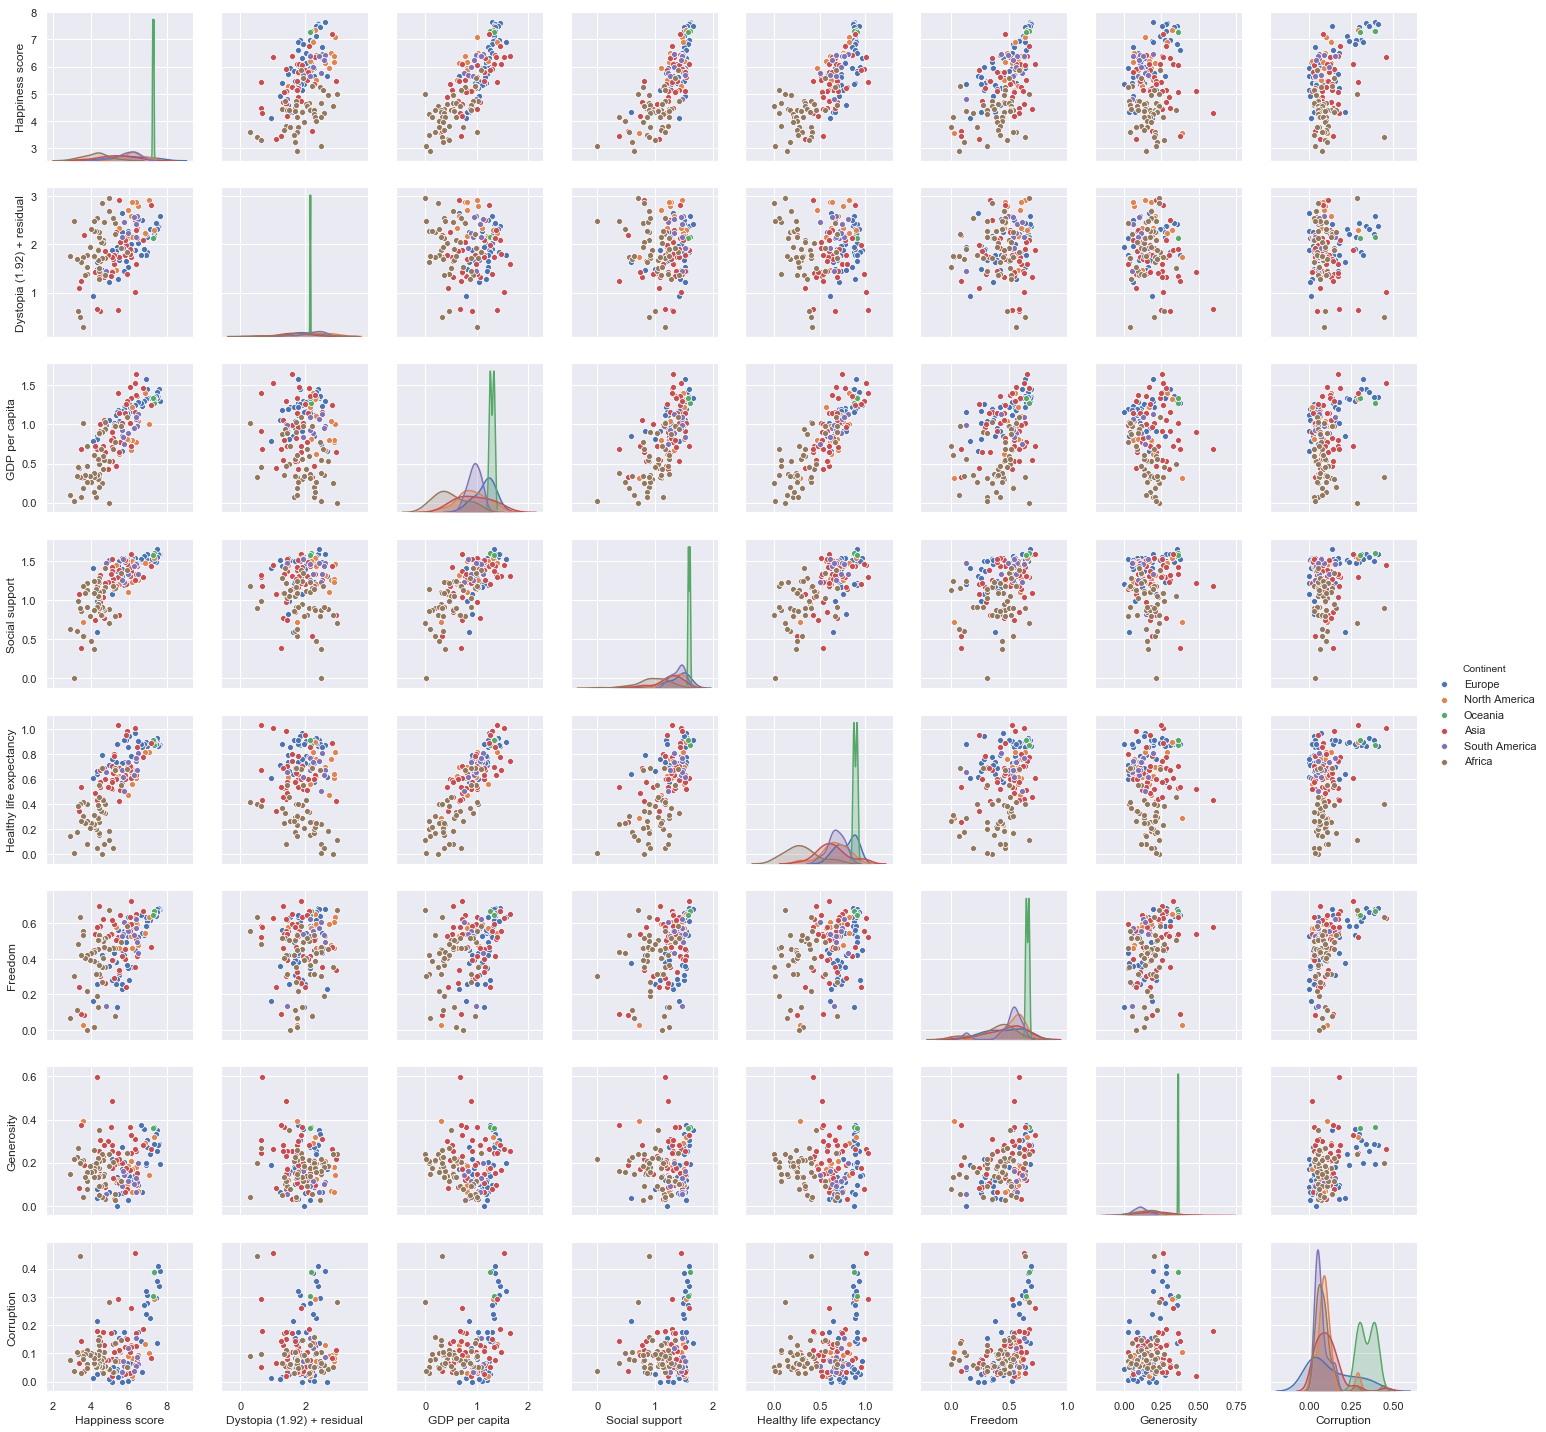

In [62]:
sb.pairplot(data = trainDF, hue='Continent')

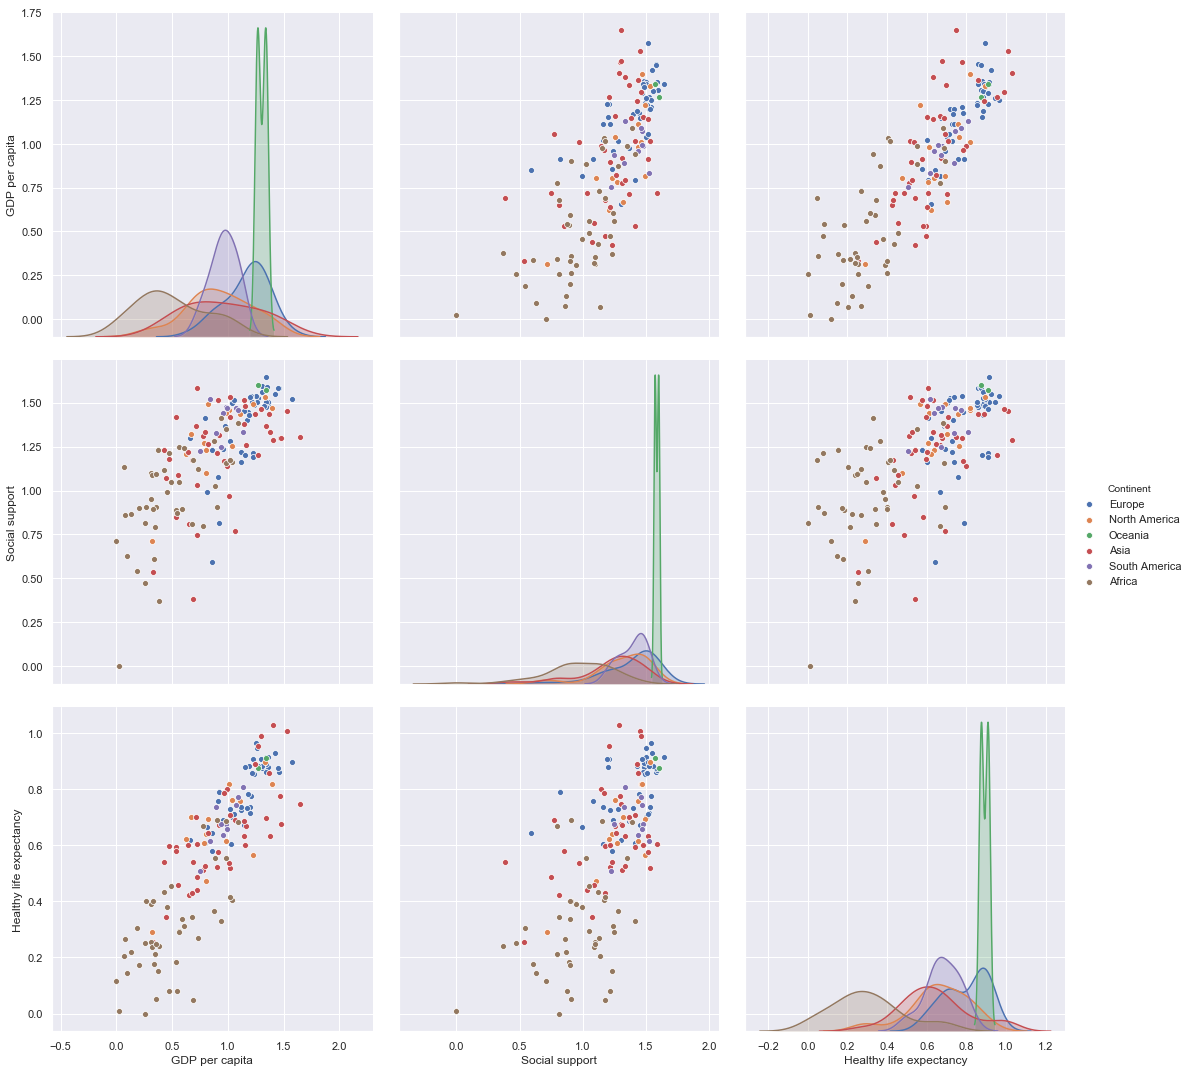

In [63]:
sb.pairplot(data = trainDF[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Continent']], hue='Continent', height=5)

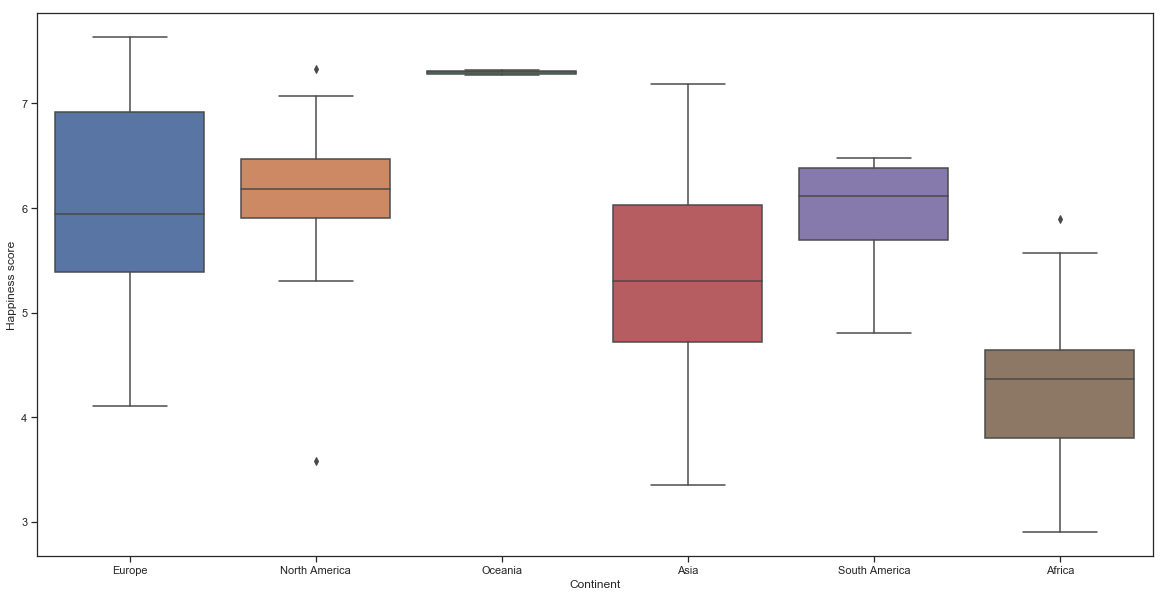

In [69]:
sb.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sb.boxplot(x='Continent', y='Happiness score', data=trainDF, ax=ax)

In [70]:
data = [go.Choropleth(
    locations = df['Country Code'],
    z = df['Happiness score'],
    text = df['Country'],
    colorscale=[[0, 'rgb(0,200,83)'],
                [0.142, 'rgb(100,221,23)'],
                [0.284, 'rgb(174,234,0)'],
                [0.426, 'rgb(255,214,0)'],
                [0.568, 'rgb(255,171,0)'],
                [0.710, 'rgb(255,109,0)'],
                [0.852, 'rgb(221,44,0)'],
                [1, 'rgb(213,0,0)']],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(0,0,0)',
            width = 0.2
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '',
        title = 'Happiness Score'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'World Happiness 2018'
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-chloropeth-map')

In [16]:
hist = pd.read_csv('change.csv')
hist = hist.rename(columns={'Explained by: GDP per capita': 'GDP per capita', 'Explained by: Social support': 'Social support', 'Explained by: Healthy life expectancy': 'Healthy life expectancy', 'Explained by: Freedom to make life choices': 'Freedom', 'Explained by: Generosity': 'Generosity', 'Explained by: Perceptions of corruption': 'Corruption'})
hist = hist.replace('Taiwan Province of China', 'Taiwan')
hist = hist.replace('South Korea', 'Korea, South')
hist = hist.replace('North Korea', 'Korea, North')
hist = hist.replace('Northern Cyprus', 'Cyprus')
hist = hist.replace('Hong Kong SAR, China', 'Hong Kong')
hist = hist.replace('Palestinian Territories', 'West Bank')
hist = hist.replace('Ivory Coast', 'Cote d\'Ivoire')
hist = hist.replace('Congo (Brazzaville)', 'Congo, Republic of the')
hist = hist.replace('Congo (Kinshasa)', 'Congo, Democratic Republic of the')
hist = hist.replace('Myanmar', 'Burma')
hist = hist.replace({'&': 'and'}, regex=True)
countryCodes = []

for row in hist['Country']:
    countryCodes.append(codes.loc[row, 'CODE'])

hist['Country Code'] = countryCodes

data = [go.Choropleth(
    locations = hist['Country Code'],
    z = hist['Changes in happiness scores'],
    text = hist['Country'],
    colorscale=[[0, 'rgb(0,200,83)'],
                [0.142, 'rgb(100,221,23)'],
                [0.284, 'rgb(174,234,0)'],
                [0.426, 'rgb(255,214,0)'],
                [0.568, 'rgb(255,171,0)'],
                [0.710, 'rgb(255,109,0)'],
                [0.852, 'rgb(221,44,0)'],
                [1, 'rgb(213,0,0)']],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(0,0,0)',
            width = 0.2
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '',
        title = 'Happiness Score'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Changes in World Happines (2008-2017)'
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    )
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-chloropeth-map')